# Small Image Classification Using Convolutional Neural Network (CNN)


In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [24]:
#Load the dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [25]:
X_test.shape


(10000, 32, 32, 3)

In [26]:
y_train.shape


(50000, 1)

In [27]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [28]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [29]:
y_test = y_test.reshape(-1,)


In [30]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [31]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

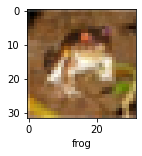

In [32]:
plot_sample(X_train, y_train, 0)


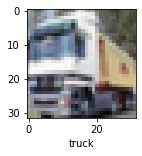

In [33]:
plot_sample(X_train, y_train, 1)


In [34]:
# Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0


MemoryError: Unable to allocate 1.14 GiB for an array with shape (50000, 32, 32, 3) and data type float64

In [35]:
#Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 75s 48ms/step - loss: nan - accuracy: 0.1001
Epoch 2/5
1563/1563 [==============================] - 75s 48ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 75s 48ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 76s 49ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 83s 53ms/step - loss: nan - accuracy: 0.1000


In [36]:
#You can see that at the end of 5 epochs, accuracy is at around 49%

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\LocalAcc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LocalAcc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LocalAcc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Now let us build a convolutional neural network to train our images
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [38]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
#With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 38.6289 - accuracy: 0.1198


[38.62893295288086, 0.11980000138282776]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]


In [ ]:
plot_sample(X_test, y_test,3)


In [ ]:
classes[y_classes[3]]


In [40]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [41]:
X_train_full.shape



(60000, 28, 28)

In [42]:
X_train_full.dtype

dtype('uint8')

In [43]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [44]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [45]:
class_names[y_train[0]]

'Coat'

# Creating the Model Using the Sequential API

# 1st Method

In [46]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# 2nd Method

In [ ]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [47]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 300)               235500    
                                                                 
 dense_18 (Dense)            (None, 100)               30100     
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.layers

In [49]:
model.layers[1].name

'dense_17'

In [51]:
model.get_layer('dense_17').name

'dense_17'

In [57]:
# Hidde layer weights
weights, biases = model.layers[1].get_weights()

In [58]:
weights

array([[-0.02852086,  0.01921235,  0.01370838, ..., -0.04452538,
         0.03971519, -0.03799145],
       [ 0.0237087 ,  0.0707211 , -0.01875095, ..., -0.04907871,
        -0.02239683,  0.02832652],
       [-0.00230449, -0.07084794,  0.04467244, ...,  0.04879526,
         0.03660229, -0.03217565],
       ...,
       [ 0.03843887, -0.05588077,  0.00910984, ...,  0.05285406,
        -0.03425683, -0.03006665],
       [-0.02415683,  0.06356646, -0.0133878 , ..., -0.06385615,
        -0.02099415,  0.02125112],
       [-0.04948235,  0.01676231, -0.06217223, ..., -0.0219142 ,
        -0.02189589,  0.04153072]], dtype=float32)

In [59]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [60]:
weights.shape

(784, 300)

In [61]:
biases.shape

(300,)

In [62]:
# Compiling the Model
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [64]:
# Training and Evaluating the Model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7077 - accuracy: 0.7691 - val_loss: 0.5040 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4888 - accuracy: 0.8294 - val_loss: 0.4662 - val_accuracy: 0.8356
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4432 - accuracy: 0.8457 - val_loss: 0.4215 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4176 - accuracy: 0.8537 - val_loss: 0.3966 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3976 - accuracy: 0.8614 - val_loss: 0.3796 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3824 - accuracy: 0.8650 - val_loss: 0.3807 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3680 - accuracy: 0.8704 - val_loss: 0.3616 - val_accuracy:

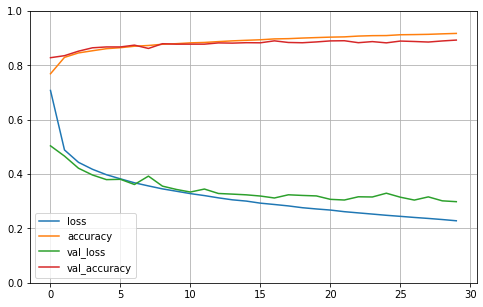

In [65]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [66]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 61.4235 - accuracy: 0.8509


[61.42354202270508, 0.8508999943733215]

# Using the Model to Make Predictions

In [67]:
X_new = X_test[:3]

In [68]:
y_proba = model.predict(X_new)

In [69]:
 y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [71]:
y_pred = model.predict(X_new)

In [72]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [76]:
import numpy as np
np.array(class_names)[y_pred].astype(int)

IndexError: arrays used as indices must be of integer (or boolean) type

In [77]:
y_new = y_test[:3]